# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [1]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

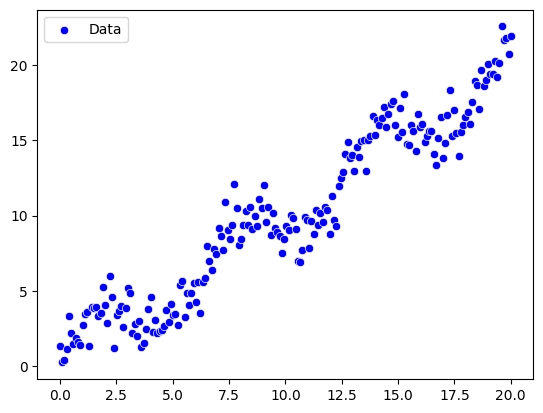

In [2]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [3]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [4]:
df = Simple1DRegressionDataset(X,y)


In [5]:
df[0]


(tensor([0.]), tensor([1.3403]))

In [6]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [7]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[11.0654]])]

In [8]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel,self).__init__()
        self.l1 = nn.Linear(1,16)
        self.l2 = nn.Linear(16,32)
        self.l3 = nn.Linear(32,1)
        self.activation = nn.ReLU()

    def forward(self,x):
        x = self.l1(x)
        x = self.activation(x)
        x = self.l2(x)
        x = self.activation(x)
        x = self.l3(x)
        return x

model_2 = LinearModel()


In [9]:
loss_fn = nn.MSELoss()

In [10]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.001)

In [11]:
# so we need now a training loop
import torch.optim.adam
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=15,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
        if epoch%20 == 0:
            print(f'Epoch {epoch}, loss: {running_loss/len(training_loader)}')



<ipython-input-11-b1c44f7c713a>:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [14]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=300
                )


Epochs:   0%|          | 0/300 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 0, loss: 5.593095855306765


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 20, loss: 5.505141964345239


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 40, loss: 6.169719028140535


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 60, loss: 4.587525253888089


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 80, loss: 4.389425163737364


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 100, loss: 4.494755595341558


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 120, loss: 3.6853183658105992


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 140, loss: 4.333014274898855


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 160, loss: 3.829013733326865


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 180, loss: 3.861716309067924


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 200, loss: 3.403965213787601


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 220, loss: 3.21238457424668


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 240, loss: 3.1948615217050973


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 260, loss: 3.370833581507104


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 280, loss: 3.730375343367341


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

In [15]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

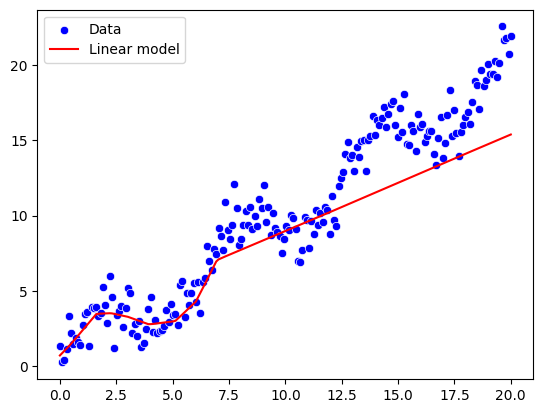

In [16]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
